<a href="https://colab.research.google.com/github/vishwaraghava009/Retail-store-sales-drivers-data-analysis/blob/main/retail_store_sales_drivers_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis of Retail Store Sales' drivers using Multilinear Regression model.

The workflow is as follows:


1.   Pick the variables.
2.   Analyze the
data.
3. Correlation
Matrix.
4. Training and
Test Set.
5. Multilinear
Regression.
6. Accuracy
Assessment.



Before going through the workflow let's import the required libraries and data

## Libraries, directory and data

In [ ]:
%cd /content/drive/MyDrive/Business Analyst course-20230613T154859Z-001/Business Analyst course/Statistics and Descriptive Analytics/Multilinear Regression

/content/drive/MyDrive/Business Analyst course-20230613T154859Z-001/Business Analyst course/Statistics and Descriptive Analytics/Multilinear Regression


In [ ]:
#libraries
import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns

In [ ]:
#load the data
df = pd.read_csv("Clothing.csv")
df.head()

,tsales,sales,margin,nown,nfull,npart,naux,hoursw,hourspw,inv1,inv2,ssize,start
0,750000,4411.765,41.0,1.0,1.0000,1.0000,1.5357,76,16.75596,17166.67,27177.04,170,41.0
1,1926395,4280.878,39.0,2.0,2.0000,3.0000,1.5357,192,22.49376,17166.67,27177.04,450,39.0
2,1250000,4166.667,40.0,1.0,2.0000,2.2222,1.4091,114,17.19120,292857.20,71570.55,300,40.0
3,694227,2670.104,40.0,1.0,1.0000,1.2833,1.3673,100,21.50260,22207.04,15000.00,260,40.0
4,750000,15000.000,44.0,2.0,1.9556,1.2833,1.3673,104,15.74279,22207.04,10000.00,50,44.0


## 1. Picking the Variables

The more reasonable variables to pick for multilinear regression are:
* annual sales in Dutch guilders, `tsales`
* gross-profit-margin, `margin`
* number of owners (managers), `nown`
* investment in shop-premises, `inv1`
* investment in automation, `inv2`
* sales floor space of the store, `ssize`
* year start of business, `start`

The reason why no.of hours worked, full-time and part-time workers are not picked for multi linear regression is because they are correalted with the tsales in both the directions, i.e, if sales gets incresed then no.of workers and working hours gets increased and simillarly if no.of workers and working hours gets increased then sales gets increased.

So, picking them will not add a great value.

In [ ]:
df = df[["tsales", "margin", "nown", "inv1", "inv2", "ssize", "start"]]
df.head()

,tsales,margin,nown,inv1,inv2,ssize,start
0,750000,41.0,1.0,17166.67,27177.04,170,41.0
1,1926395,39.0,2.0,17166.67,27177.04,450,39.0
2,1250000,40.0,1.0,292857.20,71570.55,300,40.0
3,694227,40.0,1.0,22207.04,15000.00,260,40.0
4,750000,44.0,2.0,22207.04,10000.00,50,44.0


## 2. Data Analysis

Performing the summary statistics
command enables to get to know
better the variables through statistics
like the mean, median, and standard
deviation

In [ ]:
#Summary statistics
df.describe()

,tsales,margin,nown,inv1,inv2,ssize,start
count,4.000000e+02,400.000000,400.000000,4.000000e+02,400.000000,400.000000,400.000000
mean,8.335842e+05,38.774230,1.283796,5.825726e+04,27829.217000,151.050000,42.808462
std,5.834638e+05,5.218184,0.639773,1.075588e+05,41501.943418,112.498254,13.296070
min,5.000000e+04,16.000000,1.000000,1.000000e+03,350.000000,16.000000,16.000000
25%,4.953400e+05,37.000000,1.000000,2.000000e+04,10000.000000,80.000000,37.000000
50%,6.942270e+05,39.000000,1.000000,2.220704e+04,22859.850000,120.000000,40.000000
75%,9.768170e+05,41.000000,1.295225,6.226923e+04,22859.850000,190.000000,42.000000
max,5.000000e+06,66.000000,10.000000,1.500000e+06,400000.000000,1214.000000,90.000000


The observations from the above summary are:
*  Potentially, we may have extreme outliers, we can see this by comparing the max value to the 75% values.

## 3. Correlation matrix

The Correlation Matrix allows you
to pick variables for your model.
Remember that if the correlation is
close to 1 or -1, you may have a
multicollinearity issue


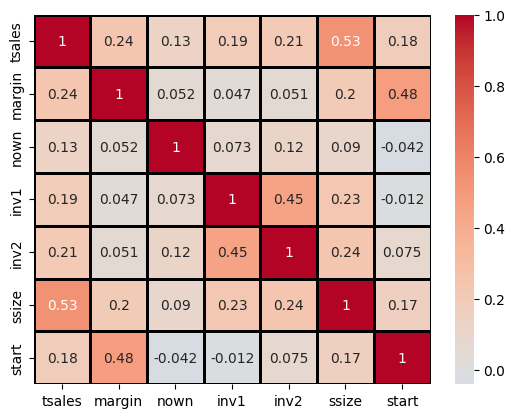

In [ ]:
sns.heatmap(df.corr(),
            annot = True,
            fmt = '.2g',
            center = 0,
            cmap = 'coolwarm',
            linewidths = 1,
            linecolor = 'black');

From the correlation matrix we could see a little to no strong correlation between any of the variables.

Now, let's assign the values fro X and y.



In [ ]:
y = df.tsales
X = df.drop(columns = ["tsales"])
X = sm.add_constant(X)

## Training and Test Set

Create a training and test set with an
80/20 split. This allows an unbiased
assessment of the model.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 63)
X_train.head()

,const,margin,nown,inv1,inv2,ssize,start
266,1.0,39.0000,1.0000,22207.04,100000.00,120,39.0000
200,1.0,44.0000,1.0000,62269.23,5000.00,140,44.0000
197,1.0,41.0000,1.2228,22207.04,22859.85,75,41.0000
258,1.0,37.4615,1.2228,22207.04,22859.85,96,41.6731
142,1.0,35.0000,2.0000,150000.00,16624.89,80,35.0000


## Multilinear Regression

Let's fit the regrssion model to our data.

In [ ]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 tsales   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     30.43
Date:                Tue, 20 Jun 2023   Prob (F-statistic):           5.49e-30
Time:                        12:17:20   Log-Likelihood:                -5801.5
No. Observations:                 400   AIC:                         1.162e+04
Df Residuals:                     393   BIC:                         1.164e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.408e+05   1.87e+05     -1.289      0.1

We could observe the following from the summary:
* Because we are having more than one independent variables, we look for `Adj. R-squared` value rather than `R-squared` value.
* Low `Adj. R-squared` value, this is may be because we could see a great correlation between any independent variable and the `tslaes` variable.
* `ssize` is statistically insignificant.
* `margin` is positively correalted with `tsales`.

## Accuracy Assessment

But, first, let's make predictions using the multilinear regression model.

In [ ]:
#predictions
predictions = model.predict(X_test)
predictions[:4]

42     8.218532e+05
328    5.220312e+05
218    1.283363e+06
93     6.903497e+05
dtype: float64

In [ ]:
#Accuracy assessment
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE:", round(mean_absolute_error(y_test, predictions),1))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, predictions)), 1))

MAE: 282586.3
RMSE: 405471.2


The MAE value of 282586.3 indicates the average absolute difference between the predicted values and the actual values. It represents the average magnitude of the errors in the predictions.

The RMSE value of 405471.2 represents the square root of the average squared differences between the predicted values and the actual values. RMSE is a measure of the overall model prediction error, giving more weight to larger errors

The MAE and RMSE values indicate that, on average, the predictions from the multilinear regression model have a significant deviation from the actual values. The errors in the predictions are quite large, suggesting that the model might not be capturing the underlying relationships in the data effectively.